In [48]:
#!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

In [49]:
#!unzip /content/weather-dataset-rattle-package.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
Data =pd.read_csv(r'C:\Users\bmage\OneDrive\Desktop\ML2\weatherAUS.csv')

df =Data.copy()
df=df.drop_duplicates()
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<Axes: ylabel='count'>

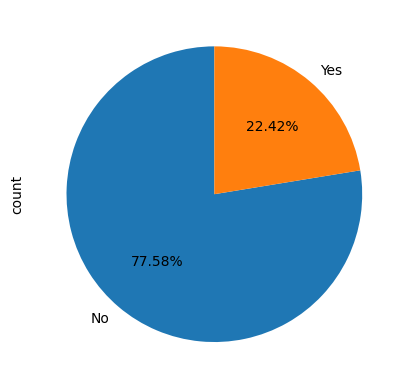

In [6]:
df['RainTomorrow'].value_counts().plot.pie(autopct='%2.2f%%', startangle=90)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
'''null_percentage = df.isnull().mean() * 100

# Create a DataFrame for better visualization
null_percentage_df = pd.DataFrame({
    'Column': null_percentage.index,
    'Null Percentage': null_percentage.values
})

# Sort the DataFrame by percentage of null values
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)

# Plot the percentage of null values
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Null Percentage', y='Column', data=null_percentage_df, palette='viridis')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',
                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                fontsize=10, color='black')

plt.title('Percentage of Null Values by Column')
plt.xlabel('Percentage of Null Values')
plt.ylabel('Column')
plt.show()'''

"null_percentage = df.isnull().mean() * 100\n\n# Create a DataFrame for better visualization\nnull_percentage_df = pd.DataFrame({\n    'Column': null_percentage.index,\n    'Null Percentage': null_percentage.values\n})\n\n# Sort the DataFrame by percentage of null values\nnull_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)\n\n# Plot the percentage of null values\nplt.figure(figsize=(12, 8))\nax = sns.barplot(x='Null Percentage', y='Column', data=null_percentage_df, palette='viridis')\n\n# Annotate each bar with its value\nfor p in ax.patches:\n    ax.annotate(f'{p.get_width():.2f}%',\n                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),\n                ha='center', va='center',\n                fontsize=10, color='black')\n\nplt.title('Percentage of Null Values by Column')\nplt.xlabel('Percentage of Null Values')\nplt.ylabel('Column')\nplt.show()"

In [9]:
df = df[df.isna().sum(axis=1) < 10]
print(len(df))

142343


## handel null values in numerical columns

## EDA

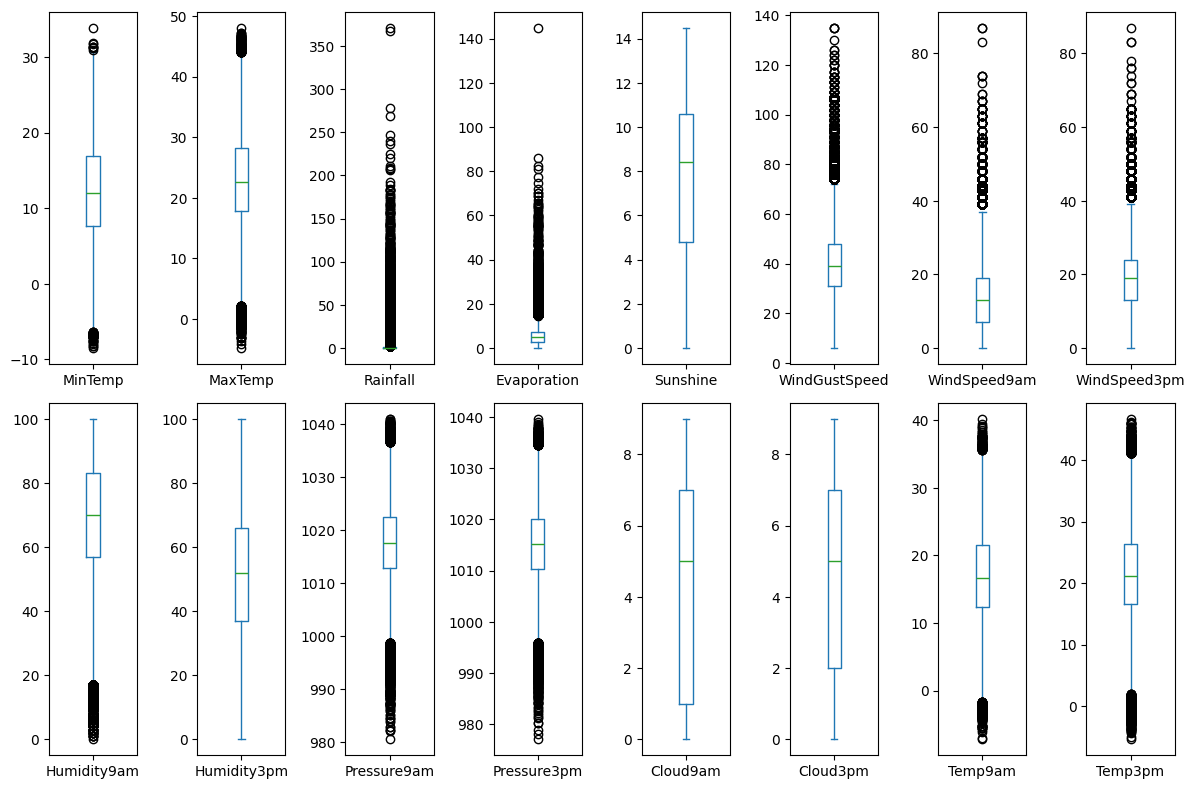

In [10]:
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [11]:
'''numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate line to the histogram
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()'''

"numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns\n\n\nfor col in numeric_cols:\n    plt.figure(figsize=(10, 6))\n    sns.histplot(df[col], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate line to the histogram\n    plt.title(f'Histogram of {col}')\n    plt.xlabel(col)\n    plt.ylabel('Frequency')\n    plt.show()"

In [12]:
df.shape

(142343, 23)

In [13]:
'''catigorical_col = df.select_dtypes(include=['O']).columns

for col in catigorical_col:
    # Get value counts
    counts = df[col].value_counts()

    # Reset index to remove duplicate index labels
    counts = counts.reset_index()
    counts.columns = [col, 'count']

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts[col], y=counts['count'], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()'''
#df = df.dropna(subset=["RainTomorrow"])


"catigorical_col = df.select_dtypes(include=['O']).columns\n\nfor col in catigorical_col:\n    # Get value counts\n    counts = df[col].value_counts()\n\n    # Reset index to remove duplicate index labels\n    counts = counts.reset_index()\n    counts.columns = [col, 'count']\n\n    plt.figure(figsize=(10, 6))\n    sns.barplot(x=counts[col], y=counts['count'], palette='viridis')\n    plt.title(f'Distribution of {col}')\n    plt.xlabel(col)\n    plt.ylabel('Count')\n    plt.xticks(rotation=90)\n    plt.show()"

## Null in catigorical columns

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def remove_null(new_df, column_name):
    print(f"Processing column: {column_name}")

    # Separate training and testing data
    train_data = new_df[new_df[column_name].notnull()]
    test_data = new_df[new_df[column_name].isnull()]

    if train_data.empty:
        print(f"No training data available for {column_name}.")
        return

    if test_data.empty:
        print(f"No test data available for {column_name}.")
        return

    # Define features and target
    X_train = train_data.drop([column_name], axis=1)
    y_train = train_data[column_name]
    X_test = test_data.drop([column_name], axis=1)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns
    numerical_cols = X_train.select_dtypes(include=['number']).columns

    # Preprocessing pipelines for numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Create and fit the pipeline based on target type
    if pd.api.types.is_numeric_dtype(y_train):
        print(f"Target column {column_name} is numerical.")
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])
    else:
        print(f"Target column {column_name} is categorical.")
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter if needed
        ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_test)

    # Fill in the missing values in the original DataFrame
    new_df.loc[new_df[column_name].isnull(), column_name] = predicted_values

# Example DataFrame with multiple columns
num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(include=["object"])

# Apply remove_null function to each column with missing values
for column in df.columns:
    if df[column].isnull().any() : #and column!="RainTomorrow":
        remove_null(df, column)


print(df.info())


Processing column: MinTemp
Target column MinTemp is numerical.
Processing column: MaxTemp
Target column MaxTemp is numerical.
Processing column: Rainfall
Target column Rainfall is numerical.
Processing column: Evaporation
Target column Evaporation is numerical.
Processing column: Sunshine
Target column Sunshine is numerical.
Processing column: WindGustDir
Target column WindGustDir is categorical.
Processing column: WindGustSpeed
Target column WindGustSpeed is numerical.
Processing column: WindDir9am
Target column WindDir9am is categorical.
Processing column: WindDir3pm
Target column WindDir3pm is categorical.
Processing column: WindSpeed9am
Target column WindSpeed9am is numerical.
Processing column: WindSpeed3pm
Target column WindSpeed3pm is numerical.
Processing column: Humidity9am
Target column Humidity9am is numerical.
Processing column: Humidity3pm
Target column Humidity3pm is numerical.
Processing column: Pressure9am
Target column Pressure9am is numerical.
Processing column: Press

In [15]:
for col in df.select_dtypes(include=["object"]).columns:
     df[col]=df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142343 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142343 non-null  datetime64[ns]
 1   Location       142343 non-null  category      
 2   MinTemp        142343 non-null  float64       
 3   MaxTemp        142343 non-null  float64       
 4   Rainfall       142343 non-null  float64       
 5   Evaporation    142343 non-null  float64       
 6   Sunshine       142343 non-null  float64       
 7   WindGustDir    142343 non-null  category      
 8   WindGustSpeed  142343 non-null  float64       
 9   WindDir9am     142343 non-null  category      
 10  WindDir3pm     142343 non-null  category      
 11  WindSpeed9am   142343 non-null  float64       
 12  WindSpeed3pm   142343 non-null  float64       
 13  Humidity9am    142343 non-null  float64       
 14  Humidity3pm    142343 non-null  float64       
 15  Press

In [16]:

'''for col in  df.select_dtypes(include=['int64', 'float64']).columns:
    df[col]=df[col].fillna(df[col].mean())
for col in df.select_dtypes(include=["category"]).columns:
    df[col]=df[col].fillna(df[col].mode()[0])
df.isna().sum()'''


'for col in  df.select_dtypes(include=[\'int64\', \'float64\']).columns:\n    df[col]=df[col].fillna(df[col].mean())\nfor col in df.select_dtypes(include=["category"]).columns:\n    df[col]=df[col].fillna(df[col].mode()[0])\ndf.isna().sum()'

## Outliers

In [17]:
catigorical_col = df.select_dtypes(include=['O']).columns

for cl in catigorical_col:
  print(cl)
  print(len(df[cl].unique()))

In [18]:
from sklearn.preprocessing import LabelEncoder
df["Date"]=df["Date"].astype("category")
categorical_columns=df.select_dtypes(include=["category"])
label_encoders = {}
cols=[]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Fit and transform the column
    label_encoders[col] = le
    cols.append(col)
print(cols)
# Save the dictionary of LabelEncoders
joblib.dump(label_encoders, 'label_encoders.pkl')


['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


['label_encoders.pkl']

In [19]:
'''from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold



model = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestClassifier(random_state=42)
baseline_scores = cross_val_score(model, X_data, y_data, cv=kfold, scoring='accuracy')
print(f'Baseline Mean Accuracy: {baseline_scores.mean():.4f}')'''

"from sklearn.model_selection import cross_val_score, KFold\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RepeatedKFold\n\n\n\nmodel = RandomForestClassifier(random_state=42)\n\n# Define the cross-validation strategy\nkfold = KFold(n_splits=5, shuffle=True, random_state=42)\n\nmodel = RandomForestClassifier(random_state=42)\nbaseline_scores = cross_val_score(model, X_data, y_data, cv=kfold, scoring='accuracy')\nprint(f'Baseline Mean Accuracy: {baseline_scores.mean():.4f}')"

In [20]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [22]:
def replace_outliers_with_iqr(df):

    columnss =[  'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
    cols=[]
    for column in columnss:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cols.append([lower_bound,upper_bound])
        # Identify outliers
        outliers_lower = df[column] < lower_bound
        outliers_upper = df[column] > upper_bound

        # Replace outliers with IQR bounds
        df.loc[outliers_lower, column] = lower_bound
        df.loc[outliers_upper, column] = upper_bound
    print(cols)
    return df

# Apply the function to your DataFrame
df = replace_outliers_with_iqr(df)

[[-6.35, 30.849999999999998], [2.2999999999999954, 43.900000000000006], [-1.2000000000000002, 2.0], [-3.8139780972602635, 13.488386858356158], [-1.5891839597562303, 16.79351037585374], [5.5, 73.5], [-11.0, 37.0], [-3.5, 40.5], [18.0, 122.0], [-6.5, 109.5], [1000.65, 1034.65], [998.0, 1032.4], [-4.172820848873743, 13.703692509324245], [-2.048021563042129, 11.413369271736881], [-1.6500000000000004, 35.550000000000004], [1.7500000000000036, 41.349999999999994]]


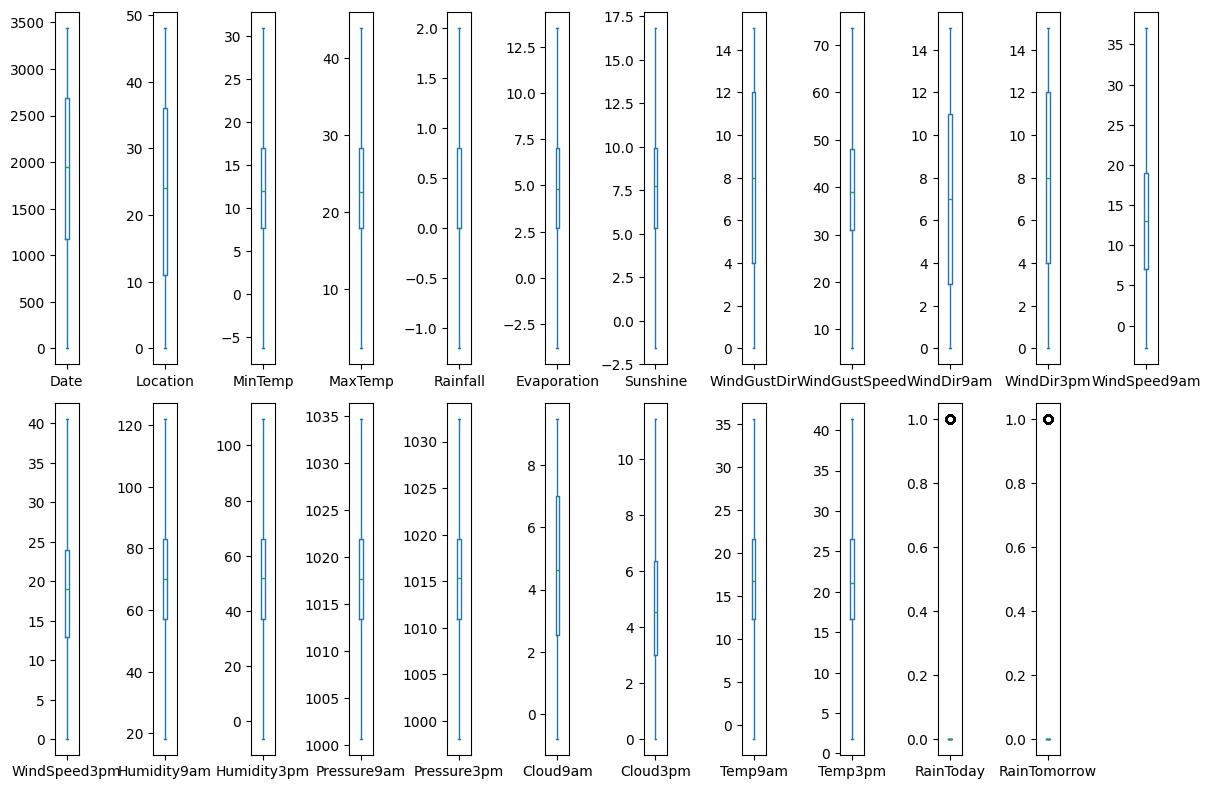

In [329]:
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [330]:
# from sklearn.model_selection import cross_validate, KFold
# from sklearn.metrics import accuracy_score

# kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# # Perform cross-validation and get training and validation scores
# results = cross_validate(model, X_data, y_data, cv=kfold,
#                          scoring='accuracy', return_train_score=True)

# # Calculate and print average training and validation accuracies
# train_accuracy = results['train_score'].mean()
# val_accuracy = results['test_score'].mean()

# print(f'Average Training Accuracy: {train_accuracy:.4f}')
# print(f'Average Validation Accuracy: {val_accuracy:.4f}')


# # Initialize the model
# model = RandomForestClassifier(random_state=42)

# # Define the cross-validation strategy
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Perform cross-validation
# cleaned_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# print(f'Cleaned Data Mean Accuracy: {cleaned_scores.mean():.4f}')

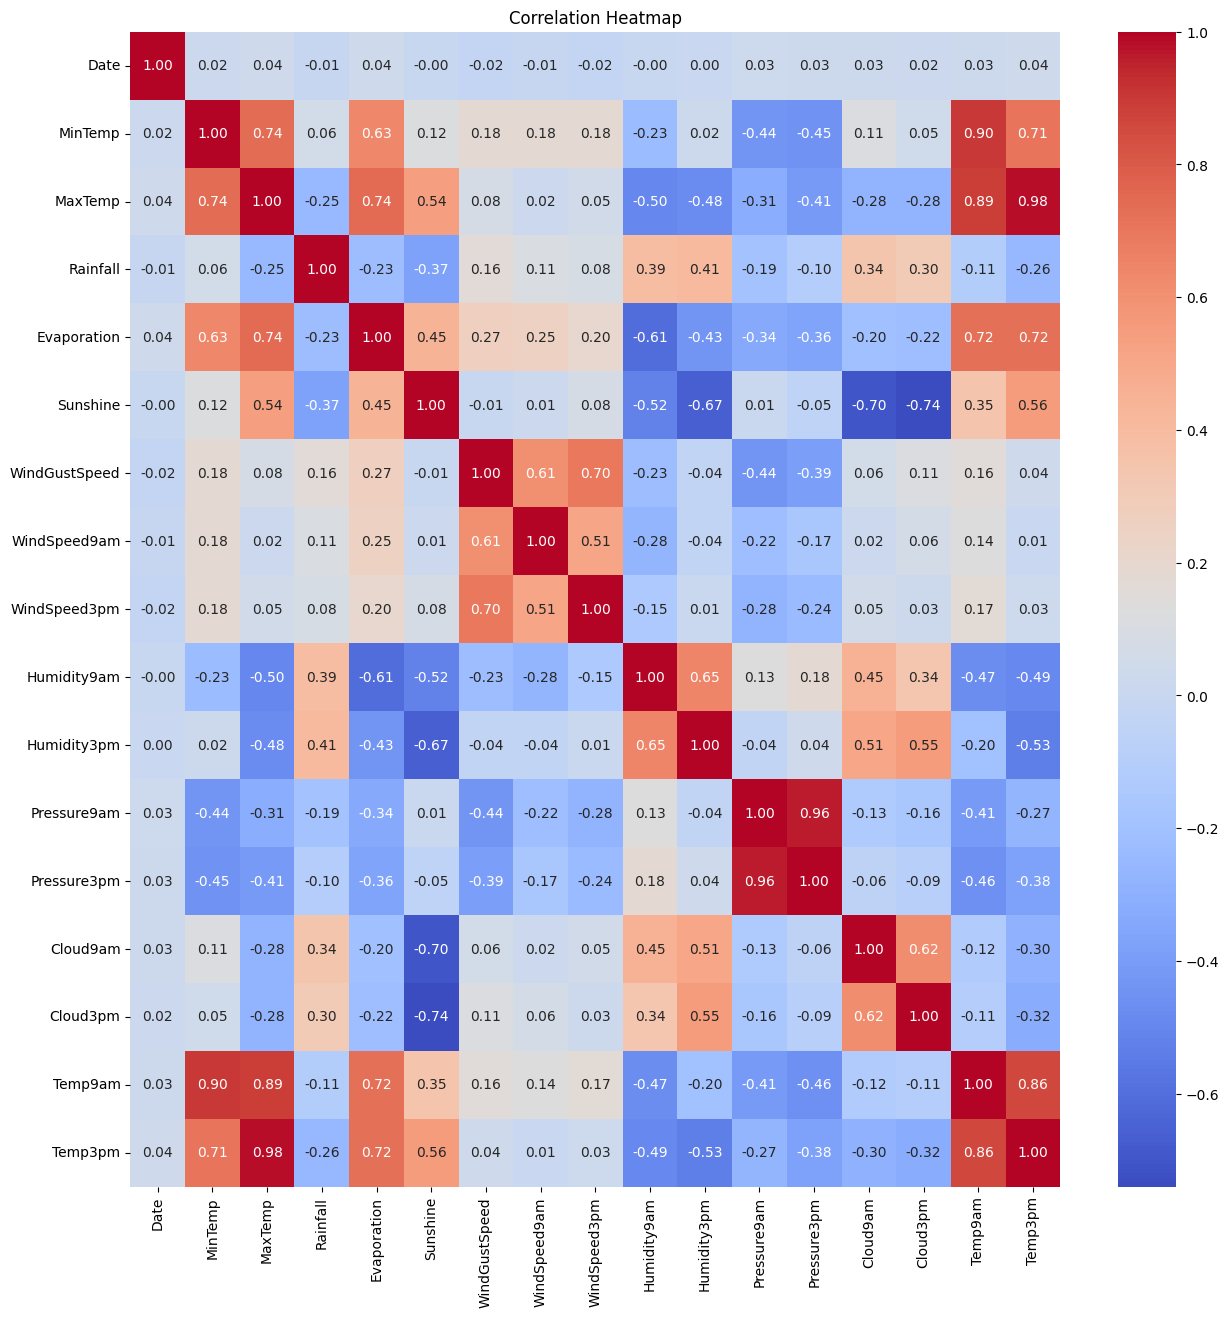

In [331]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr =df[numeric_cols].corr()

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [332]:
df.drop(['Temp9am','Pressure3pm','MaxTemp','Rainfall','Temp3pm'] ,axis=1 ,inplace=True)

In [333]:
from sklearn.preprocessing import StandardScaler


'''columnss =[  'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']'''
df["Date"]=df["Date"].astype("float32")
columnss =[  'MinTemp', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm','Date'
       ]
scaler = StandardScaler()
df[columnss] = scaler.fit_transform(df[columnss])
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [334]:
df.head()

,Date,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,-1.733255,2,0.186657,0.116337,0.105917,13,0.337635,13,14,0.703584,0.637862,0.111255,-1.419849,-1.498613,1.480393,0.139203,0,0
1,-1.732122,2,-0.752930,0.228470,0.731849,14,0.337635,6,15,-1.162522,0.402763,-1.318204,-1.276628,-1.063535,-0.481622,-0.539397,0,0
2,-1.730989,2,0.108358,0.984352,1.149957,15,0.492713,13,15,0.586952,0.872960,-1.635862,-1.037926,-1.513616,-0.526263,-1.095847,0,0
3,-1.729856,2,-0.471054,0.516637,0.897707,4,-1.213145,9,0,-0.346100,-1.125380,-1.265261,-1.706292,-0.013347,-0.473959,-0.748644,0,0
4,-1.728722,2,0.828708,0.478157,-0.286555,13,0.105018,1,7,-0.812627,0.167664,0.693627,-0.894704,-1.033530,1.068009,1.550398,0,0


In [335]:
from sklearn.model_selection import train_test_split


X_data =df.drop('RainTomorrow' ,axis=1)
y_data =df['RainTomorrow']

X_train ,X_test ,y_train ,y_test =train_test_split(X_data ,y_data ,test_size =.2 ,random_state=42 ,shuffle=True)

print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('y_train' ,y_train.shape)
print('y_test' ,y_test.shape)

X_train (113874, 17)
X_test (28469, 17)
y_train (113874,)
y_test (28469,)


In [336]:
y_train.value_counts()


RainTomorrow
0    88482
1    25392
Name: count, dtype: int64

In [337]:
'''from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold



model = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

baseline_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Baseline Mean Accuracy: {baseline_scores.mean():.4f}')'''

"from sklearn.model_selection import cross_val_score, KFold\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RepeatedKFold\n\n\n\nmodel = RandomForestClassifier(random_state=42)\n\n# Define the cross-validation strategy\nkfold = KFold(n_splits=5, shuffle=True, random_state=42)\n\nbaseline_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')\nprint(f'Baseline Mean Accuracy: {baseline_scores.mean():.4f}')"

In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


model =RandomForestClassifier(random_state =42)



model.fit(X_train ,y_train)


y_pred =model.predict(X_train)
print(accuracy_score(y_pred ,y_train))

y_pred =model.predict(X_test)
print(accuracy_score(y_pred ,y_test))
print(classification_report(y_pred ,y_test))

0.9999824367283138
0.8738627981313007
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     23863
           1       0.58      0.80      0.67      4606

    accuracy                           0.87     28469
   macro avg       0.77      0.85      0.80     28469
weighted avg       0.90      0.87      0.88     28469



## NN

In [339]:
import tensorflow as tf

def NN(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)  # Corrected: shape= instead of input_shape=
    x = tf.keras.layers.Dense(512, activation="relu")(inputs)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dense(32, activation="relu")(x)
    x = tf.keras.layers.Dense(16, activation="relu")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    NN_model = tf.keras.Model(inputs=inputs, outputs=output)  # Corrected: Model with plural inputs= and outputs=
    return NN_model

# Define model
input_shape = (X_train.shape[1],)
NN_model = NN(input_shape)

# Compile the model
NN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected: optimizers with 's'
              loss="binary_crossentropy",  # Corrected: Spelling of binary_crossentropy
              metrics=["accuracy"])

# Train the model
batch_size=64
NN_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  # Removed extra parentheses

Epoch 1/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8377 - loss: 0.3731 - val_accuracy: 0.8523 - val_loss: 0.3403
Epoch 2/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8542 - loss: 0.3399 - val_accuracy: 0.8569 - val_loss: 0.3353
Epoch 3/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8587 - loss: 0.3282 - val_accuracy: 0.8602 - val_loss: 0.3263
Epoch 4/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8614 - loss: 0.3230 - val_accuracy: 0.8601 - val_loss: 0.3286
Epoch 5/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8652 - loss: 0.3180 - val_accuracy: 0.8603 - val_loss: 0.3241
Epoch 6/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8661 - loss: 0.3121 - val_accuracy: 0.8618 - val_loss: 0.3276
Epoch 7/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8719 - loss: 0.2985 - val_accuracy: 0.8733 - val_loss: 0.3047
Epoch 8/20
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8780 - loss: 0.2866 - 

In [340]:
joblib.dump(NN_model, 'NN_model.pkl')


['NN_model.pkl']

In [341]:
'''import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Print classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))'''


'import pandas as pd\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, accuracy_score\n\n\n\n# Define the model\nrf = RandomForestClassifier(random_state=42)\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'bootstrap\': [True, False]\n}\n\n# Setup the GridSearchCV\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, \n                           cv=5, n_jobs=-1, verbose=2)\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Score:", grid_search.best_score_)\n\n# Predict on the test set\ny_pred = grid_search.predict(X_test)\n\n# Print classification report and accuracy score\nprint("

Accuracy: 86.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22080
           1       0.79      0.52      0.63      6389

    accuracy                           0.86     28469
   macro avg       0.83      0.74      0.77     28469
weighted avg       0.86      0.86      0.85     28469



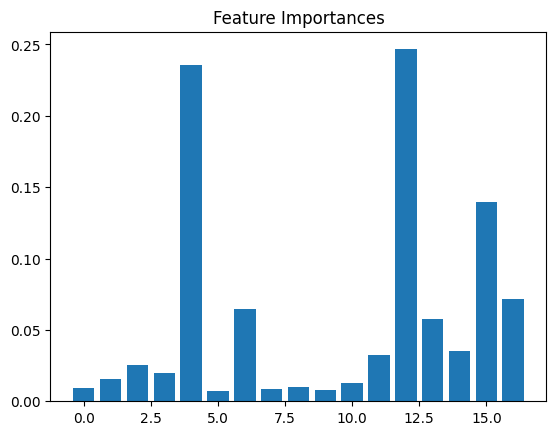

In [342]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import numpy as np

rf_model = RandomForestClassifier(
    n_estimators=100,            # Number of trees
    max_depth=10,                # Limit the depth of each tree
    min_samples_split=10,        # Minimum number of samples required to split a node
    min_samples_leaf=5,          # Minimum number of samples required to be at a leaf node
    max_features='sqrt',         # Number of features to consider for the best split
    max_samples=0.8,             # Percentage of samples to use for each tree
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)


# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances")
plt.show()


c:\Users\bmage\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 87.72%


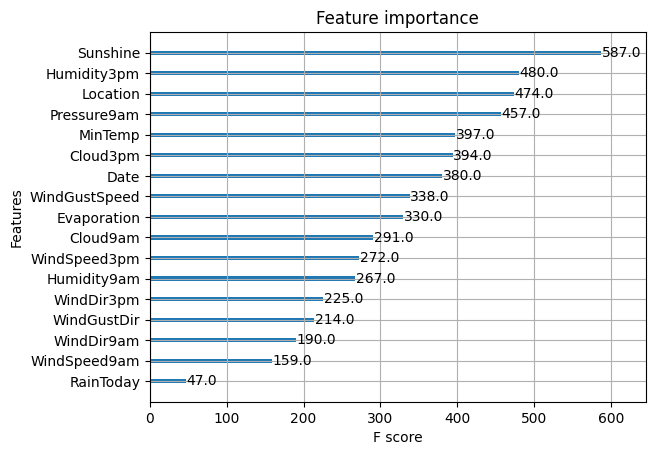

In [343]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data (replace with your own dataset)
# X: Feature matrix, y: Labels
# X, y = ...

# Split data into training and testing sets

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


In [344]:
import tensorflow as tf

def NN(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)  # Corrected: shape= instead of input_shape=
    x = tf.keras.layers.Dense(512, activation="relu")(inputs)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dense(32, activation="relu")(x)
    x = tf.keras.layers.Dense(16, activation="relu")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    NN_model = tf.keras.Model(inputs=inputs, outputs=output)  # Corrected: Model with plural inputs= and outputs=
    return NN_model

# Define model
input_shape = (X_train.shape[1],)
NN_model = NN(input_shape)

# Compile the model
NN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected: optimizers with 's'
              loss="binary_crossentropy",  # Corrected: Spelling of binary_crossentropy
              metrics=["accuracy"])

# Train the model
batch_size=64
NN_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))  # Removed extra parentheses

Epoch 1/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8343 - loss: 0.3741 - val_accuracy: 0.8502 - val_loss: 0.3432
Epoch 2/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8546 - loss: 0.3385 - val_accuracy: 0.8562 - val_loss: 0.3326
Epoch 3/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8574 - loss: 0.3302 - val_accuracy: 0.8602 - val_loss: 0.3305
Epoch 4/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8603 - loss: 0.3260 - val_accuracy: 0.8605 - val_loss: 0.3278
Epoch 5/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8616 - loss: 0.3203 - val_accuracy: 0.8580 - val_loss: 0.3254
Epoch 6/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8688 - loss: 0.3070 - val_accuracy: 0.8718 - val_loss: 0.3015
Epoch 7/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8741 - loss: 0.2932 - val_accuracy: 0.8758 - val_loss: 0.2897
Epoch 8/50
3559/3559 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8814 - loss: 0.2780 -

In [346]:
new_df=Data.dropna()

In [347]:
new_df.to_csv("Rain2.csv")

In [349]:
X_data.to_csv("X_test.csv")